In [1]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [2]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [3]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [4]:
def change_zeros_to_point_one(input_array):
    return [[0.1 if item == 0 else item for item in row] for row in input_array]


In [5]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [6]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [7]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [8]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [9]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    # if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    # similarity = dot_product / (norm_vec1 )
    # similarity = dot_product
    return similarity

In [10]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [11]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 1 1 0 1 1 1]
 [0 0 0 1 0 0 0 1]
 [0 1 1 1 0 1 1 1]
 [0 1 0 0 0 0 0 1]
 [0 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 0 0]]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 1.  1.  1.  0.1 1.  1.  1. ]
 [0.1 0.1 0.1 1.  0.1 0.1 0.1 1. ]
 [0.1 1.  1.  1.  0.1 1.  1.  1. ]
 [0.1 1.  0.1 0.1 0.1 0.1 0.1 1. ]
 [0.1 1.  1.  1.  0.1 1.  1.  1. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


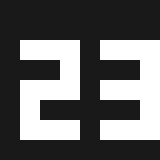

In [12]:

pattern = np.array([ 
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0],
        [0,1,1,1,0,1,1,1],
        [0,0,0,1,0,0,0,1],
        [0,1,1,1,0,1,1,1],
        [0,1,0,0,0,0,0,1],
        [0,1,1,1,0,1,1,1],
        [0,0,0,0,0,0,0,0]])
print(pattern)
pattern = np.array(change_zeros_to_point_one(pattern))
print(pattern)
binary_array_to_png_and_display(pattern,scale_factor=20)

pattern_vec = feature_map(pattern)

In [13]:
global_image_arr = []

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.97777024 0.39636786 0.35165441]
  [0.5416728  0.84519086 0.62957376]
  [0.4449675  0.4262373  0.53722332]
  [0.2936215  0.97087718 0.3166402 ]
  [0.39437096 0.40365708 0.36792759]
  [0.26438613 0.06532894 0.7075722 ]
  [0.86567332 0.15037784 0.15569527]
  [0.31046521 0.98018614 0.76830594]]

 [[0.0798356  0.21180782 0.84784826]
  [0.18301112 0.22096561 0.27763065]
  [0.13004108 0.90779557 0.0303133 ]
  [0.01242651 0.86928572 0.72723671]
  [0.40306605 0.36266653 0.20318399]
  [0.44719713 0.78224815 0.47034438]
  [0.60769181 0.2743758  0.72695072]
  [0.04287718 0.70891946 0.8345909 ]]

 [[0.76089812 0.42686341 0.20263577]
  [0.5634

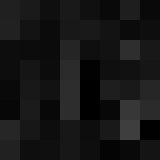

Current loss: 1.3764154002640676


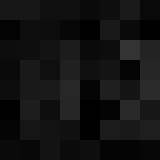

Current loss: 1.2209158350557865


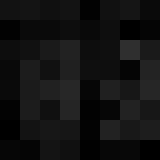

Current loss: 1.1681886748292358


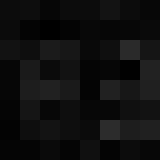

Current loss: 1.130149641944104


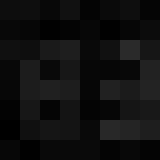

Current loss: 1.1045720849171268


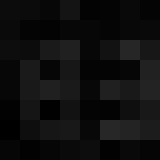

Current loss: 1.0891463010456433


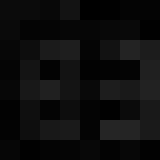

Current loss: 1.0717260640839705


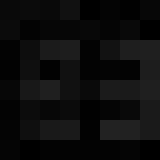

Current loss: 1.064427960639567


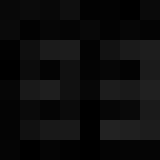

Current loss: 1.0569403073440684


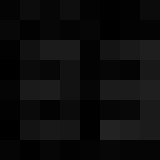

Current loss: 1.0480061230348516


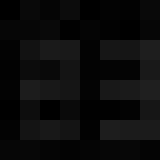

Current loss: 1.0396522687149123


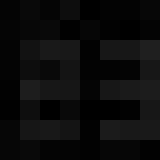

Current loss: 1.0358975810859024


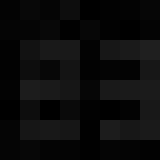

Current loss: 1.0318969567070826


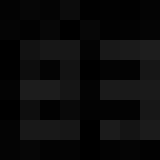

Current loss: 1.0275952227033236


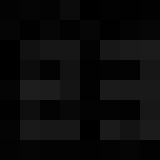

Current loss: 1.0256115082372166


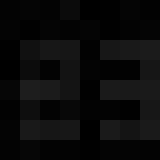

Current loss: 1.023004989336919


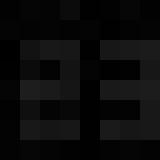

Current loss: 1.0204829305549878


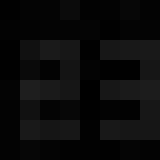

Current loss: 1.0187636822820263


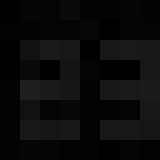

Current loss: 1.016924038232289


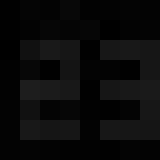

Current loss: 1.0152046941800728


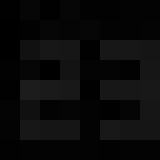

Current loss: 1.0136426516158215


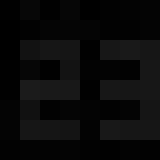

Current loss: 1.0120585225037784


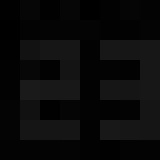

Current loss: 1.0099131089117437


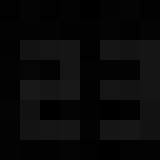

Current loss: 1.0085489051794627


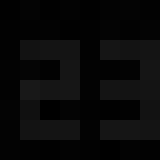

Current loss: 1.0066499495944723


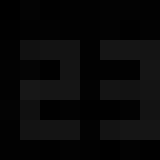

Current loss: 1.0052887505525685


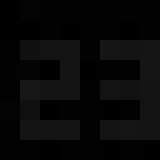

Current loss: 1.0048240184502142


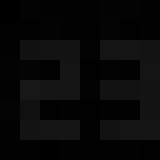

Current loss: 1.0042655429484058


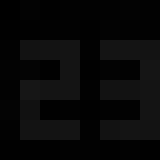

Current loss: 1.0038569958937116


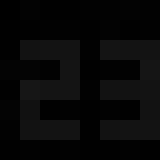

Current loss: 1.00345467955712


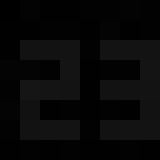

Current loss: 1.0029918728755256


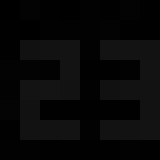

Current loss: 1.0025260464959405


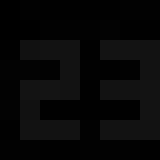

Current loss: 1.002406884876942


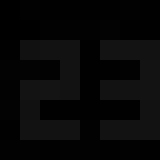

Current loss: 1.0022143225107574


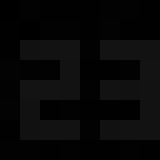

Current loss: 1.0019705487776258


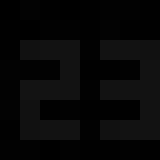

Current loss: 1.0018300266797875


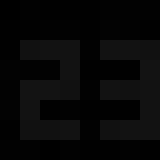

Current loss: 1.00164659383212


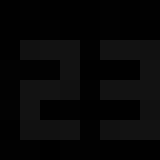

Current loss: 1.00142432920184


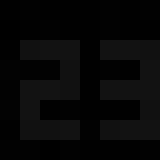

Current loss: 1.0012487466416764


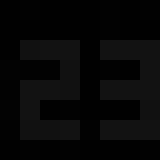

Current loss: 1.001087205464675


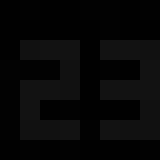

Current loss: 1.0009242014370905


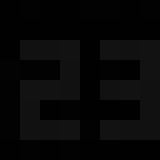

Current loss: 1.000784469772805


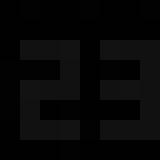

Current loss: 1.0006934150531843


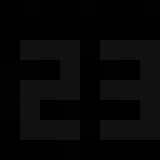

Current loss: 1.0006051510608815


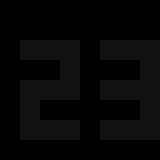

Current loss: 1.000530347926724


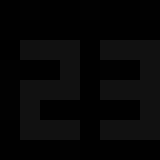

Current loss: 1.0004778395778178


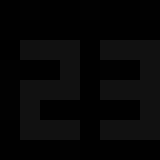

Current loss: 1.000432781664839


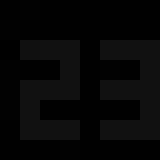

Current loss: 1.000392751888409


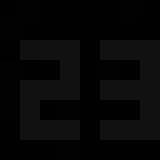

Current loss: 1.0003693539339655


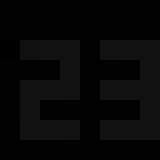

Current loss: 1.0003492074362261


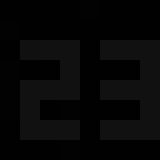

Current loss: 1.0003260576494128


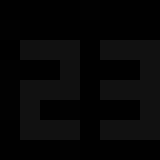

Current loss: 1.0003068773607415


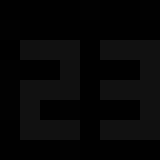

Current loss: 1.0002787282527534


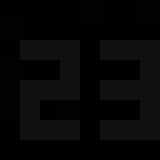

Current loss: 1.0002483605120551


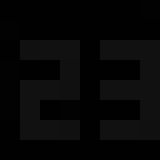

Current loss: 1.0002203829739993


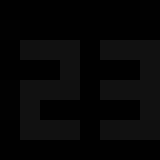

Current loss: 1.000181591028852


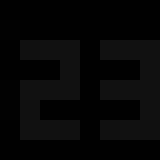

Current loss: 1.0001535954453316


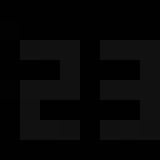

Current loss: 1.0001391280656378


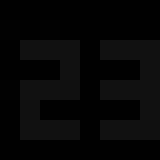

Current loss: 1.0001290927212154


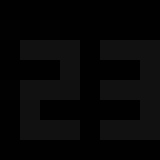

Current loss: 1.0001154831225272


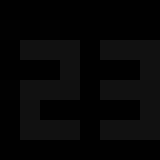

Current loss: 1.000099199524651


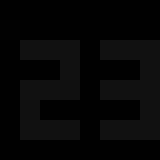

Current loss: 1.0000820925758525


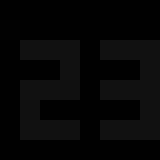

Current loss: 1.000069466088307


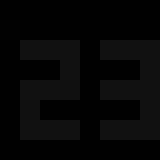

Current loss: 1.000062001500453


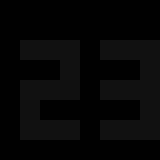

Current loss: 1.000057156112298


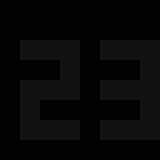

Current loss: 1.0000527942828987


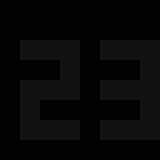

Current loss: 1.000048632937731


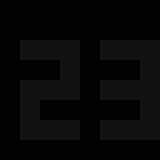

Current loss: 1.0000446731030923


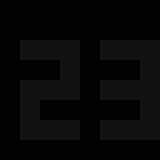

Current loss: 1.0000411507297253


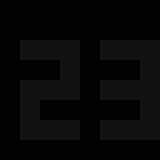

Current loss: 1.0000375028208417


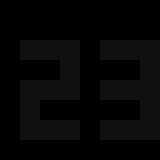

Current loss: 1.000033438847184


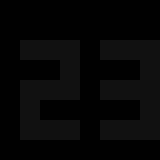

Current loss: 1.0000293857772697


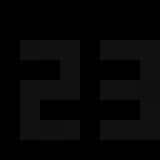

Current loss: 1.0000260005745398


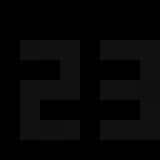

Current loss: 1.000023503216688


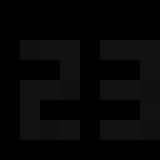

Current loss: 1.0000211184324448


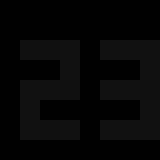

Current loss: 1.0000186108489513


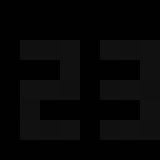

Current loss: 1.0000163239504603


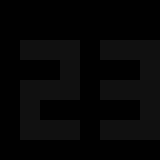

Current loss: 1.0000143652048883


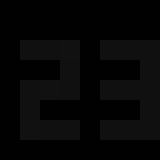

Current loss: 1.0000126373629472


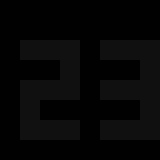

Current loss: 1.0000111519904034


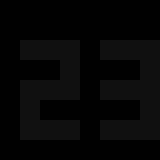

Current loss: 1.0000099229536081


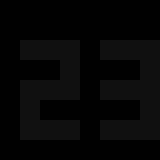

Current loss: 1.000008955026727


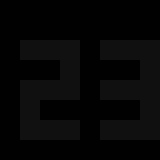

Current loss: 1.0000081681754496


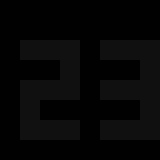

Current loss: 1.0000074951578193


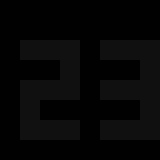

Current loss: 1.0000069699902228


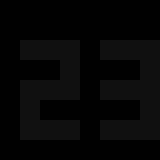

Current loss: 1.0000066105383063


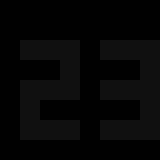

Current loss: 1.00000630461163


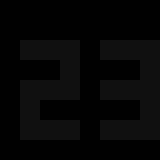

Current loss: 1.0000059616406287


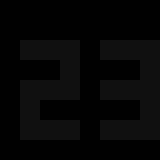

Current loss: 1.0000056440462006


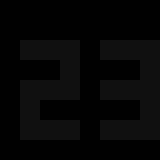

Current loss: 1.0000054137855863


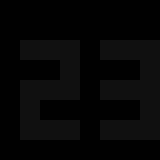

Current loss: 1.0000052196055176


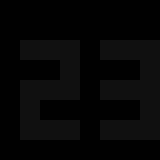

Current loss: 1.0000049484454674


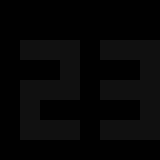

Current loss: 1.0000045302636005


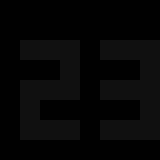

Current loss: 1.0000040014495806


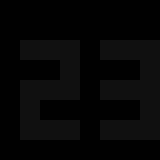

Current loss: 1.000003600502929


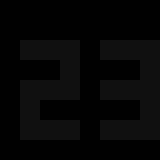

Current loss: 1.0000033209839445


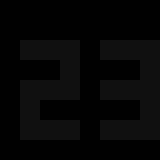

Current loss: 1.000003102231211


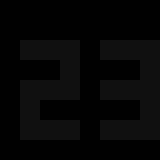

Current loss: 1.0000028348291412


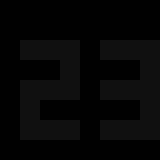

Current loss: 1.00000250318287


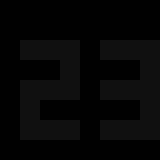

Current loss: 1.0000021448838672


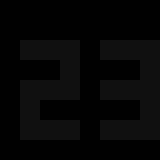

Current loss: 1.000001827484129


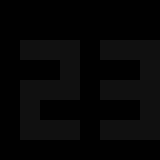

Current loss: 1.0000015774052151


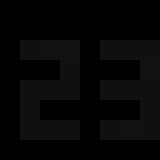

Current loss: 1.000001385242575


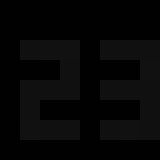

Current loss: 1.0000012231892879


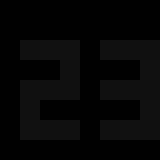

Current loss: 1.000001072103557


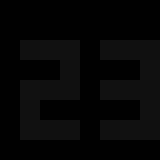

Current loss: 1.0000009196136732


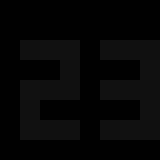

Current loss: 1.0000007630736971


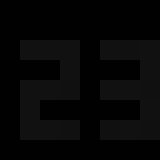

Current loss: 1.0000006228394864


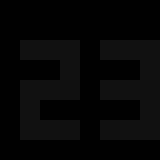

Current loss: 1.0000005225590494


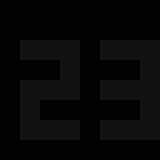

Current loss: 1.0000004591360576


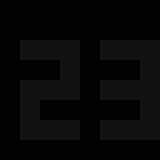

Current loss: 1.0000004130370637


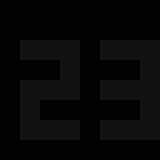

Current loss: 1.0000003712070162


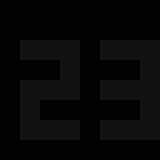

Current loss: 1.0000003325629403


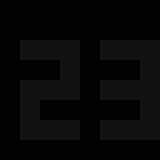

Current loss: 1.0000002992311776


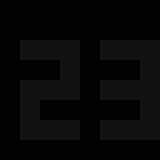

Current loss: 1.0000002683010631


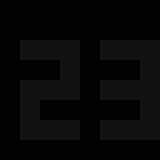

Current loss: 1.0000002344017285


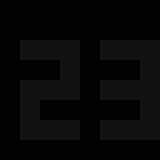

Current loss: 1.0000001957281743


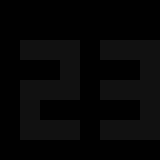

Current loss: 1.0000001589471925


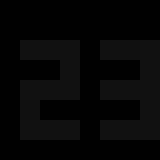

Current loss: 1.000000132906068


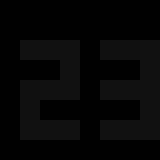

Current loss: 1.0000001185195149


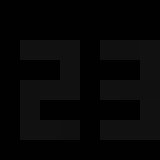

Current loss: 1.0000001100913278


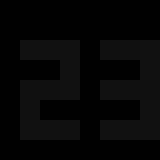

Current loss: 1.000000102947391


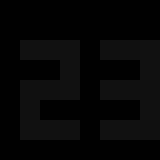

Current loss: 1.000000094789496


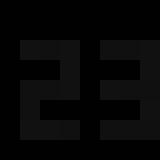

Current loss: 1.000000085056155


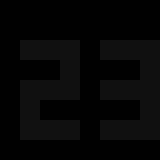

Current loss: 1.0000000756390586


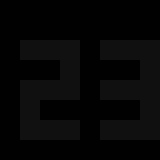

Current loss: 1.0000000692954762


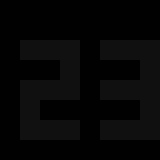

Current loss: 1.0000000655822234


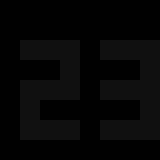

Current loss: 1.0000000621784313


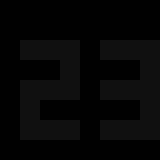

Current loss: 1.0000000569851806


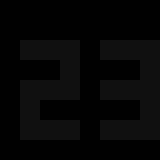

Current loss: 1.0000000492610341


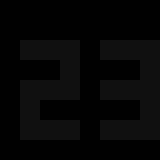

Current loss: 1.0000000409280525


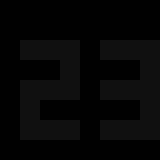

Current loss: 1.0000000351104548


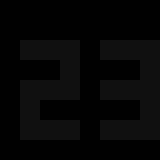

Current loss: 1.0000000317216977


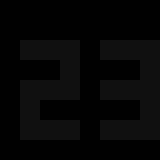

Current loss: 1.0000000285736785


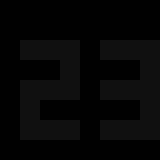

Current loss: 1.0000000240047109


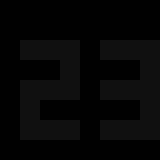

Current loss: 1.0000000181986797


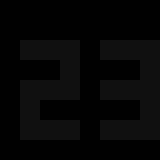

Current loss: 1.0000000129192403


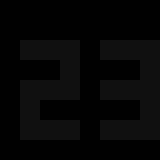

Current loss: 1.0000000095395511


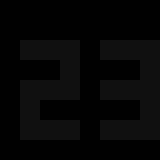

Current loss: 1.000000007563094


In [14]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)




# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1/(score)
    # return -score



def callback(params):
    global global_image_arr
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    global_image_arr = image_arr
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    loss = objective(params)
    print("Current loss:", loss)
    if abs(loss-1)<0.002:
        return True
   
    
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [15]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

Optimized Parameters: [ 0.9777746   0.78265636  1.02038405  0.54167184  0.99571739  0.61272763
  0.44496841 -0.26656426  0.78327655  0.29362392  1.24739343 -0.16398582
  0.39437475  0.97133354  0.88352499  0.26438684 -0.12232314  0.9932365
  0.86567617  0.4781586  -0.16258119  0.31046489  1.16733281  1.19664674
 -0.18700488  0.74980181  0.59779889  0.07427115  0.36088754  0.47915868
  0.12891515  0.7445438  -0.17781706  0.14889631  0.1166592   0.73398663
  0.45125247  0.12900901 -0.05163834 -0.1526664   1.01730109  0.97355923
  0.76504965  0.79829842  0.20836508  0.44754853  1.04681959  0.56464138
  0.32615791  0.55704363  0.27478319  0.65917788  0.35330052  0.1853022
  0.77802581  1.18368174  0.43294239  0.84454549  0.94768579 -0.5682196
  0.78157498  1.15794656 -0.05063202  0.32951457  0.31246462  1.41583228
  0.33301629  0.98420356  0.72389974  0.09609882  0.65804736  0.51433225
  1.18040846  1.1207353   0.20848242 -0.0354949  -0.16135262  0.01519059
  0.27594053  0.61040925  0.4100

In [16]:
# res = circuit(weights_p1,0)
# print(res)

In [17]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)


NameError: name 'res' is not defined